
# <center><font style="color:rgb(100,109,254)">  Numpy Crash Course</font><center>


"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more"
-https://docs.scipy.org/doc/numpy-1.10.1/user/whatisnumpy.html.


##  <font style="color:rgb(34,169,34)">  Importing Numpy </font> 

** The `np` is a very popular alias given to numpy **

In [1]:
import numpy as np

Let's run through an example showing how powerful NumPy is. <br>
Suppose we have two lists `a` and `b`, consisting of the first `100,000 non-negative numbers`, and we want to create a new list c whose ith element is `a[i] * b[i]`.


###   <font style="color:rgb(34,169,34)"> Approach Without NumPy:  </font> 

** Using Python lists **

** Python List Comprehension **

In [2]:
%%time
a = [i for i in range(100000)]
b = [i for i in range(100000)]





Wall time: 172 ms


That's the thing we want you to notice the real time difference.
The Wall Time which a process needs to complete its task .
1st : Wall time: 25 ms 
2nd : Wall time: 84.9 ms. <br><br>
<i> **Note: ** The `%%time` is the magic command for calculating the execution time of the cell. <br> </i>


## <font style="color:rgb(34,169,34)"> Using Numpy  </font> 

In [3]:
%%time
a = np.arange(100000)
b = np.arange(100000)

Wall time: 20.9 ms


# c = a * b

In [4]:
%%time
c = a  * b

Wall time: 997 µs


The result is 10 to 15 times faster, and we could do it in fewer lines of code (and the code itself is more intuitive)

Regular Python is much slower due to type checking and other overhead of needing to interpret code and support Python's abstractions.

For example, if we are doing some addition in a loop, constantly type checking in a loop will lead to many more instructions than just performing a regular addition operation. NumPy, using optimized pre-compiled C code, is able to avoid a lot of the overhead introduced.



##  <font style="color:rgb(34,169,34)"> What is an Array  </font> 
** A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension. **

Creating A simple array of 3 integers


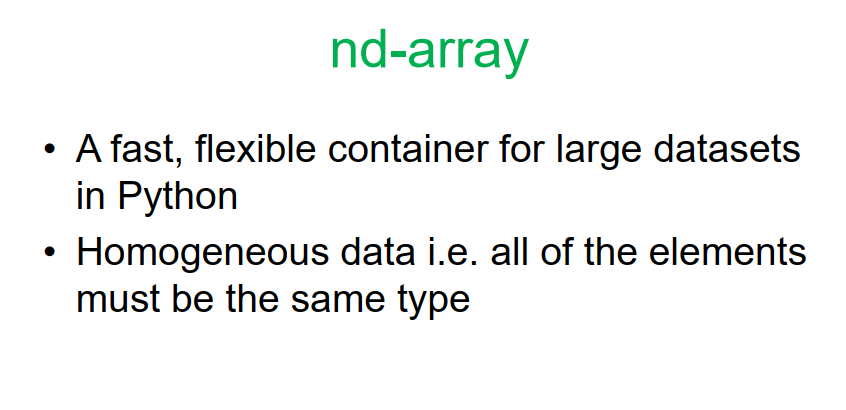

 `Item Size`
** Itemsize is the size of one element,this gives 4 cause u have integers and so each item = 4 bytes. **

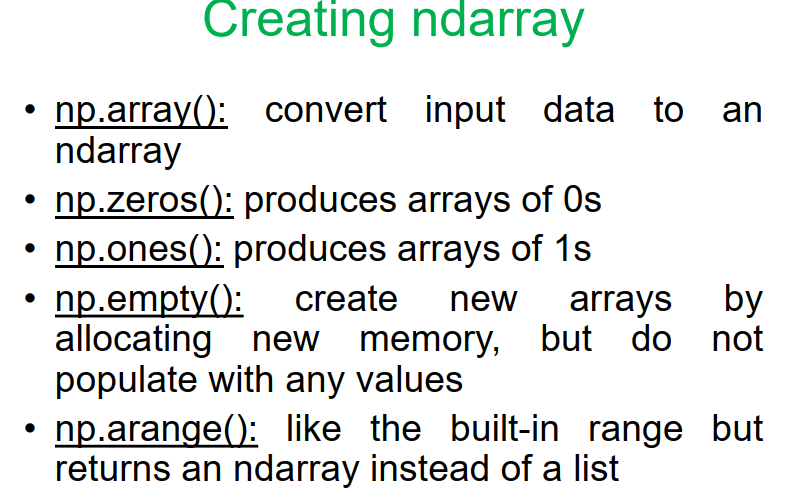

In [5]:
a = np.array([3,3,0,3,3]) #1D array
a

array([3, 3, 0, 3, 3])

In [ ]:
a = np.zeros((2, 2))   # Create an array of all zeros of specified shape
print(a) 

        

In [ ]:
a = np.ones((2, 2))    # Create an array of all ones
print(a)

In [ ]:
b = np.full((2, 2), 7)  # Create a constant array
print(b)   

In [ ]:
c = np.eye(2)   # Create a 2 x 2 identity matrix
print(c)  



In [ ]:
d = np.random.randint(5,10, size=(2, 2))  # Create a 2x2 array filled with random values from 5-10
print(d)

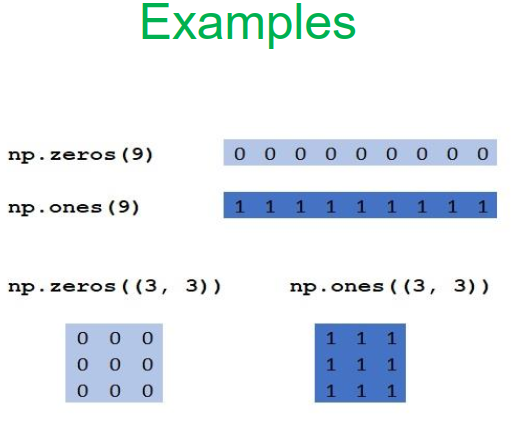

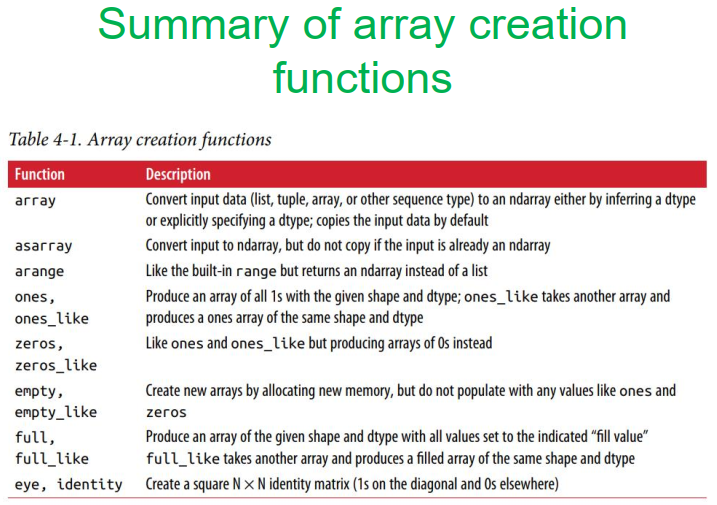

# Array Creation Complete

 ###  <font style="color:rgb(34,169,34)"> Creating a 2D Array  </font> 


In [ ]:
b=np.array([[2,3],[4,5],[6,7]]) # 2D array
print(b.ndim)
print(b.shape) # returns rows,columns
b


 ###  <font style="color:rgb(34,169,34)"> Creating a 3D Array  </font>


In [ ]:
b = np.array([[[1],[2],[3]],[[4],[5],[6]]])   # Create a rank 3 array
print (b)
print(b.ndim)
print(b.shape)


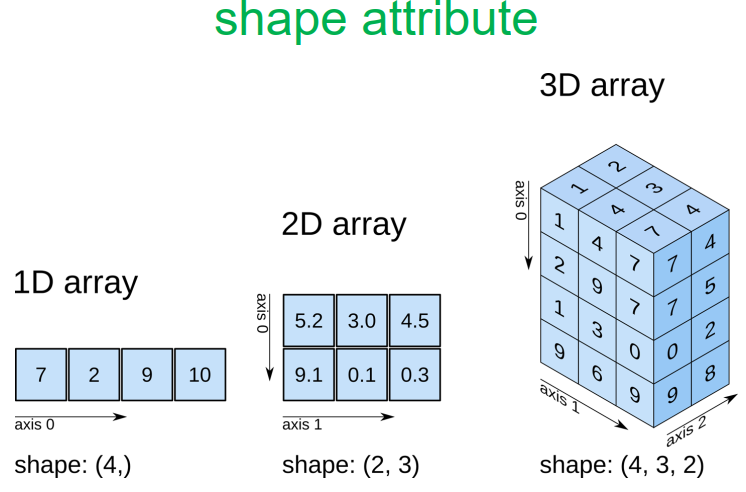

# Slide 32

###  <font style="color:rgb(34,169,34)"> Reshaping an Array  </font> 



In [ ]:
nums = np.arange(16)
print(nums)
print(nums.shape)



**Now lets reshape that 16, to a 4x4 array **



In [ ]:
nums = nums.reshape((4, 4))
print('Reshaped:\n', nums)
print(nums.shape)



** Using -1 ** 

The -1 in reshape corresponds to an unknown dimension that numpy will figure out based on all other dimensions and the array size. We Can only specify one unknown dimension. For example, sometimes we might have an unknown number of data points, and so we can use -1 instead without worrying about the true number.





In [ ]:
nums = nums.reshape((4,-1 ))
print('Reshaped with -1:\n', nums)
print(nums.shape)



** NumPy supports an object-oriented paradigm, such that ndarray has a number of methods and attributes, with functions similar to ones in the outermost NumPy namespace. ** <br>
<i>For example, we can do both: </i>



In [ ]:
nums = np.arange(8)
print(nums.min())     
print(np.min(nums))   

# Vectorization 

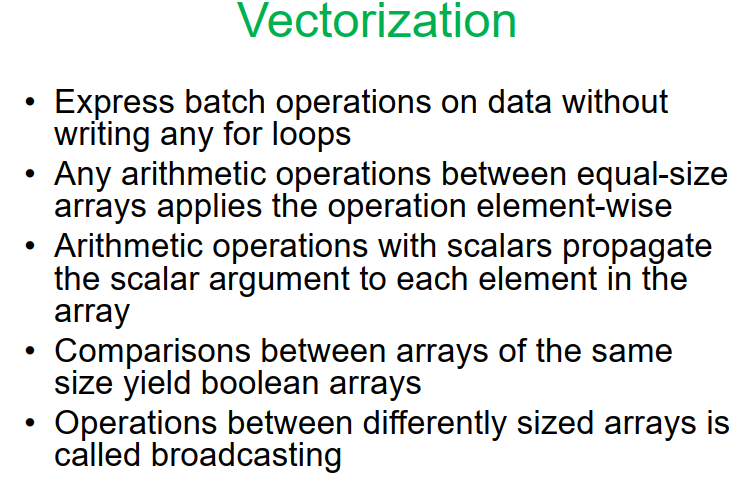

## <font style="color:rgb(34,169,34)"> Array Operations/Math  </font> 



In [ ]:
x = np.array([[1, 2],
              [3, 4]], dtype=np.float64)
y = np.array([[5, 6],
              [7, 8]], dtype=np.float64)



** Addition **

In [ ]:
print(x + y)
print(np.add(x, y))



** Subtraction **



In [ ]:
print(x - y)
print(np.subtract(x, y))



**Multiplication **



In [ ]:
print(x * y)
print(np.multiply(x, y))



In [ ]:
** Division **



In [ ]:
How do we elementwise divide between two arrays?

print(x / y)
print(np.divide(x, y))

<small>Note * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects </small>



 ## <font style="color:rgb(34,169,34)">  Numpy Functions </font> 
There are many useful functions built into NumPy, and often we're able to express them across specific axes of the ndarray:

x = np.array([[1, 2, 3], 
              [4, 5, 6]])

print(np.sum(x))          # Compute sum of all elements
print(np.sum(x, axis=0))  # Compute sum of each row
print(np.sum(x, axis=1))  # Compute sum of each col

**Note:** `Axis 0` is `row` and `Axis 1` is `column`

**np.Max**

print(np.max(x, axis=1))  # Compute max of each row

** Argmax ** <br>
How can we compute the index of the max value of each row? Useful, to say, find the class that corresponds to the maximum score for an input image.

x = np.array([[1, 2, 3], 
              [4, 5, 6]])

print(np.argmax(x, axis=0)) # Compute index of max of each row

** Computing on a specific Axis **

x = np.array([[1,2],[3,4]])
print("array: ",x)
print("-----")
print ("sum of all elements : ",np.sum(x))  # Compute sum of all elements; prints "10"
print ("sum of rows : ", np.sum(x, axis=0))  # Compute sum of each rows; prints "[4 6]"
print ("sum of cols : " ,np.sum(x, axis=1))  # Compute sum of each cosl; prints "[3 7]"

The process we used above is vectorization. Vectorization refers to applying operations to arrays instead of just individual elements (i.e. no loops).

** Why vectorize? **

1. Much faster
2. Easier to read and fewer lines of code
3. More closely assembles mathematical notation

<i>Vectorization is one of the main reasons why NumPy is so powerful.</i>

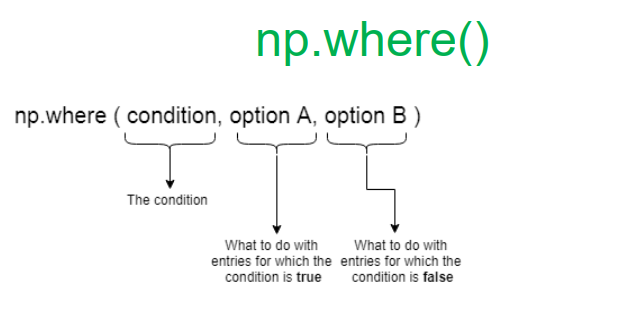

#  SLIDE 23

# Slide 24

# Slide 25

# Slide 26

##  <font style="color:rgb(34,169,34)"> Flatten vs Ravel   </font> 

 The primary functional difference is that flatten() is a method of an ndarray object and hence can only be called for true numpy arrays. In contrast ravel() is a library-level function and hence can be called on any object that can successfully be parsed. For example ravel() will work on a list of ndarrays, while flatten (obviously) won't

In [32]:
print (b)

[[7 7]
 [7 7]]


In [33]:
b.flatten() 

array([7, 7, 7, 7])

In [34]:
# flattening the array ...used in computer vision a lot..
b.ravel()

array([7, 7, 7, 7])


## <font style="color:rgb(34,169,34)">  Filtering   </font> 
We can also use boolean indexing/masks. Suppose we want to set all elements greater than MAX to MAX:

In [47]:
MAX = 5
nums = np.array([1, 4, 10, -1, 15, 0, 5])
print(nums > MAX)           


nums[nums > MAX] = MAX
print(nums)                 

[False False  True False  True False False]
[ 1  4  5 -1  5  0  5]


##  <font style="color:rgb(34,169,34)"> Stacking   </font> 

`numpy.stack()`:
**Joins a sequence of arrays along a new axis. **<br>

In [48]:
a =  np.arange(9).reshape(3 , 3)
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [49]:
b = np.arange(10,19).reshape(3,3)
print(b)

[[10 11 12]
 [13 14 15]
 [16 17 18]]


In [50]:
c = np.arange(20,29).reshape(3,3)
print(c)

[[20 21 22]
 [23 24 25]
 [26 27 28]]


**Horizontal Stacking**

In [51]:
np.hstack((a, b,c))

array([[ 0,  1,  2, 10, 11, 12, 20, 21, 22],
       [ 3,  4,  5, 13, 14, 15, 23, 24, 25],
       [ 6,  7,  8, 16, 17, 18, 26, 27, 28]])

**Vertical Stacking**

In [52]:
np.vstack((a, c , b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [20, 21, 22],
       [23, 24, 25],
       [26, 27, 28],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

**1D vectors ** <br>
The problem with 1 D vectors or 0 rank arrays is that you can't define them as row or column vectors, so sometimes it may be better to define them as 2D

In [53]:
v=np.random.rand(5)
print(v)
print(v.shape)

[0.36002813 0.51640934 0.23725216 0.76414866 0.32828224]
(5,)


** Row Vector ** 

In [54]:
v=np.random.rand(1,5)
print(v)
print(v.shape)  #row vector

[[0.56104424 0.87639475 0.9995233  0.90205072 0.01042738]]
(1, 5)


** Column Vector ** 

In [55]:
v=np.random.rand(5,1)
print(v)
print(v.shape)   #column vector

[[0.59253107]
 [0.65136991]
 [0.24824272]
 [0.04357178]
 [0.37257176]]
(5, 1)



### <font style="color:rgb(34,169,34)"> Converting Python Lists to Numpy arrays   </font> 

In [56]:
pythonlist = [2,3,4,4]
print(type(pythonlist))
numpylist = np.array(pythonlist)
print(type(numpylist))

<class 'list'>
<class 'numpy.ndarray'>



## <font style="color:rgb(34,169,34)"> View and Copies.  </font> 

Unlike a copy, in a **view** of an array, the data is shared between the view and the array. Sometimes, our results are copies of arrays, but other times they can be views. Understanding when each is generated is important to avoid any unforeseen issues.


### <font style="color:rgb(34,169,34)">  Views  </font> 
** Views can be created from a slice of an array **

In [57]:
x = np.arange(5)
print('Original:\n', x)  

# Modifying the view will modify the array
view = x[0:3]
view[0] = -100
print('Array After Modified View:\n', x) 

Original:
 [0 1 2 3 4]
Array After Modified View:
 [-100    1    2    3    4]


### <font style="color:rgb(34,169,34)"> Copy  </font> 
Just add a `.copy()` after the array to prevent it from being modified

In [58]:
x = np.arange(5)
print('Original:\n', x) 

# Copy, will not modify the original array.
copy = x[1:3].copy()   
copy[1] = -100
print('Copy:\n', copy) 
print('Array After Modified Copy:\n', x)  

Original:
 [0 1 2 3 4]
Copy:
 [   1 -100]
Array After Modified Copy:
 [0 1 2 3 4]



## <font style="color:rgb(34,169,34)">Summary   </font> 

1. Numpy is an incredibly powerful library for computation providing both massive efficiency gains and convenience.
2. Vectorize! Orders of magnitude faster.
3. Keeping track of the shape of your arrays is often useful.
4. Many of the useful math functions and operations are built into Numpy.
5. Watch out for views vs. copies.